In [37]:
import pandas as pd
import numpy as np
import os
cwd = os.getcwd()

ROOT = os.path.join(cwd, '../')
DATA_FOLDER = os.path.join(ROOT, 'data/')
RAW_DATA_FOLDER = os.path.join(DATA_FOLDER, 'raw/')

In [38]:
df = pd.read_pickle(os.path.join(RAW_DATA_FOLDER, 'saeb_pb_2017-2007.pkl'))
df.head()

,correcao_licao_casa,faz_licao_casa,pai_le,indicador_prova_brasil,pretensao_futura,preenchimento_questionario,id_escola,reprovacao,localizacao,tempo_trabalho_domestico,...,indicador_proficiencia,gosta_estudar_disciplina,leitura_historia_quadrinhos,possui_geladeira,frequenta_cinema,area,possui_freezer,estrato,responsaveis_incentivam_comparecer_aulas,disciplina
1697,A,A,B,1,C,1,25049119,A,1,A,...,1,A,A,B,C,2,A,251550031,A,MT
4485,A,A,A,1,D,1,25049119,A,1,A,...,1,A,C,B,C,2,A,251550031,A,LP
6255,A,A,B,1,C,1,25072161,A,1,C,...,1,A,C,B,B,2,B,250400921,A,LP
7923,B,B,A,1,A,1,61211348,B,1,E,...,1,None,None,B,B,2,A,250320931,None,MT
8086,A,A,B,1,A,1,25042351,A,1,D,...,1,A,C,B,C,2,B,251030321,B,LP


In [39]:
# print columns with dtype object
print(df.select_dtypes(include=['object']).columns)
columns_to_treat = df.select_dtypes(include=['object']).columns

Index(['correcao_licao_casa', 'faz_licao_casa', 'pai_le', 'pretensao_futura',
       'id_escola', 'reprovacao', 'localizacao', 'tempo_trabalho_domestico',
       'possui_casa_banheiro', 'mora_pai', 'possui_tv',
       'possui_geladeira_freezer', 'id_regiao', 'pai_sabe_ler_escrever',
       'frequenta_espetaculo_exposicao', 'desempenho_aluno',
       'leitura_revista_comportamento', 'possui_computador',
       'possui_empregada_domestica_cinco_dias', 'caderno', 'raca_cor',
       'responsaveis_conversam_escola', 'leitura_jornais', 'turno',
       'responsaveis_incentivam_leitura', 'possui_automovel',
       'possui_maquina_lavar_roupa', 'escolaridade_pai',
       'frequenta_biblioteca', 'evasao_escolar_ate_final_ano',
       'leitura_revistas_geral', 'quantidade_pessoas_domicilio',
       'responsaveis_incentivam_realizacao_licao_casa', 'mae_le', 'sigla_uf',
       'id_aluno', 'bloco_2', 'id_turma', 'respostas_bloco_1',
       'possui_casa_dormitorio', 'responsaveis_incentivam_estudos',

In [40]:
df['desempenho_aluno'].value_counts(dropna=False)

desempenho_aluno
Básico          164142
Insuficiente    110366
Proficiente      34333
Avançado          4098
Name: count, dtype: int64

In [41]:
# changing 'desempenho_aluno' to categorical numerical values
# Insuficiente = 0, Básico = 1, Proficiente = 2, Avançado = 3
# dropping None values

# drop the ones with value 'None'
_ = df.dropna(subset=['desempenho_aluno']).copy()

_.loc[:, 'desempenho_aluno_cat'] = _['desempenho_aluno'].map({'Insuficiente': 0, 'Básico': 1, 'Proficiente': 2, 'Avançado': 3})
#df['desempenho_aluno'] = df['desempenho_aluno'].astype(int)

df = _

df['desempenho_aluno_cat'].value_counts(dropna=False)

desempenho_aluno_cat
1    164142
0    110366
2     34333
3      4098
Name: count, dtype: int64

In [42]:
exclude = ['ano', 'sigla_uf', 'id_aluno', 'situacao_censo', 'disciplina', 'rede', 'id_escola', 'serie', 'turno', 'escola_publica', 'id_turma',
           'bloco_1', 'respostas_bloco_1', 'caderno', 'id_municipio', 'id_regiao', 'respostas_bloco_2', 'bloco_2', 'faixa_etaria', 'localizacao',
           'area', 'rede_ef']

for column in columns_to_treat:
    if column not in exclude:
        print(column, df[column].unique())

correcao_licao_casa ['A' 'B' 'C' None 'D']
faz_licao_casa ['A' 'B' 'C' None 'D']
pai_le ['B' 'A' None]
pretensao_futura ['C' 'D' 'A' 'B' None]
reprovacao ['A' 'B' 'C' None]
tempo_trabalho_domestico ['A' 'C' 'E' 'D' 'B' None]
possui_casa_banheiro ['B' 'C' None 'A' 'E' 'D']
mora_pai ['B' 'A' 'C' None]
possui_tv ['C' 'B' None 'D' 'A' 'E']
possui_geladeira_freezer ['B' 'A' None 'C' 'D' 'E']
pai_sabe_ler_escrever ['A' 'B' None 'C']
frequenta_espetaculo_exposicao ['B' 'C' None 'A' nan]
desempenho_aluno ['Básico' 'Insuficiente' 'Proficiente' 'Avançado']
leitura_revista_comportamento ['C' 'B' 'A' None nan]
possui_computador ['A' 'B' None 'C' 'D' 'E']
possui_empregada_domestica_cinco_dias ['A' None 'B' 'C' 'E' 'D' nan]
raca_cor ['F' 'D' 'C' 'B' None 'A' 'E']
responsaveis_conversam_escola ['B' 'A' None]
leitura_jornais ['C' 'B' 'A' None nan]
responsaveis_incentivam_leitura ['A' None 'B']
possui_automovel ['A' 'B' None 'C' 'D' 'E']
possui_maquina_lavar_roupa ['B' 'A' None 'D' 'C' 'E']
escolaridad

In [43]:
# questões "tempo_"
# Fora da escola em dias de aula, quanto tempo você usa para: 
# lazer, trabalho doméstico
# A: Menos de 1 hora (1)
# B: Entre 1 a 2 horas (2)
# C: Mais de 2 horas (3)
# D: Mais de 3 horas (4)
# E: Não uso meu tempo para isso (0)

tempo_columns = [col for col in df.columns if 'tempo_' in col]
for column in tempo_columns:
    unique_values = []
    for value in df[column].unique():
        if value is not None:
            unique_values.append(value)
    print(column, sorted(unique_values))

for column in tempo_columns:
    df[column] = df[column].map({'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 0})

df[tempo_columns].head()

tempo_trabalho_domestico ['A', 'B', 'C', 'D', 'E']
tempo_lazer ['A', 'B', 'C', 'D', 'E']


,tempo_trabalho_domestico,tempo_lazer
1697,1.0,4.0
4485,1.0,1.0
6255,3.0,3.0
7923,0.0,2.0
8086,4.0,1.0


In [44]:
# questões "responsaveis_" (exceto 'reuniao_pais')
# Seus pais ou responsaveis incentivam você a ...
# A: Sim (1)
# B: Não (0)

# questão "responsaveis_comparecem_reuniao_pais"
# Com que frequência seus pais ou responsaveis comparecem as reuniões de pais da escola?
# A: Sempre (2)
# B: Às vezes (1)
# C: Nunca (0)

responsaveis = [col for col in df.columns if 'responsaveis_' in col and col != 'responsaveis_comparecem_reuniao_pais']
for column in responsaveis:
    unique_values = []
    for value in df[column].unique():
        if value is not None:
            unique_values.append(value)
    print(column, sorted(unique_values))

for column in responsaveis:
    df[column] = df[column].map({'A': 1, 'B': 0})

df['responsaveis_comparecem_reuniao_pais'] = df['responsaveis_comparecem_reuniao_pais'].map({'A': 2, 'B': 1, 'C': 0})

df[responsaveis + ['responsaveis_comparecem_reuniao_pais']].head()

responsaveis_conversam_escola ['A', 'B']
responsaveis_incentivam_leitura ['A', 'B']
responsaveis_incentivam_realizacao_licao_casa ['A', 'B']
responsaveis_incentivam_estudos ['A', 'B']
responsaveis_incentivam_comparecer_aulas ['A', 'B']


,responsaveis_conversam_escola,responsaveis_incentivam_leitura,responsaveis_incentivam_realizacao_licao_casa,responsaveis_incentivam_estudos,responsaveis_incentivam_comparecer_aulas,responsaveis_comparecem_reuniao_pais
1697,0.0,1.0,1.0,1.0,1.0,1.0
4485,1.0,1.0,1.0,1.0,1.0,2.0
6255,1.0,1.0,1.0,1.0,1.0,1.0
7923,NaN,NaN,NaN,1.0,NaN,NaN
8086,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
df['escolaridade_mae'].value_counts(dropna=False)

escolaridade_mae
B       71926
C       51078
E       46931
G       39224
D       38688
F       27472
A       25556
None    12064
Name: count, dtype: int64

In [46]:
# questões "escolaridade_"
# Até que série seu pai, ou o homem responsável por você, estudou?	
# A) Nunca estudou. (0)
# B) Não completou a 4.ª série/5.º ano.	
# C) Completou a 4.ª série/5.º ano, mas não completou a 8.ª série/9.º ano.	
# D) Completou a 8.ª série/9.º ano, mas não completou o Ensino Médio.	
# E) Completou o Ensino Médio, mas não completou a Faculdade.	
# F) Completou a Faculdade.	
# G) Não sei.	

escolaridade = ['escolaridade_mae', 'escolaridade_pai']
# droppar 'Não sei'
for column in escolaridade:
    unique_values = []
    for value in df[column].unique():
        if value is not None:
            unique_values.append(value)
    print(column, sorted(unique_values))
    df = df[df[column] != 'G'] # não sei

for column in escolaridade:
    df[column] = df[column].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5})

df[escolaridade].head()

escolaridade_mae ['A', 'B', 'C', 'D', 'E', 'F', 'G']
escolaridade_pai ['A', 'B', 'C', 'D', 'E', 'F', 'G']


,escolaridade_mae,escolaridade_pai
6255,4.0,1.0
8086,1.0,0.0
8463,NaN,3.0
10602,NaN,3.0
11128,4.0,1.0


In [47]:
# # questões "possui_" (exceto possui_trabalho
# Não tem.	Sim, um.	Sim, dois.	Sim, três.	Sim, quatro ou mais.

possui_columns = [col for col in df.columns if 'possui_' in col and 'trabalho' not in col]

for column in possui_columns:
    unique_values = []
    for value in df[column].unique():
        if value is not None and not pd.isna(value):
            unique_values.append(value)
    print(column, sorted(unique_values))

for column in possui_columns:
    df[column] = df[column].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4})

df['possui_trabalho'] = df['possui_trabalho'].map({'A': 1, 'B': 0})

df[possui_columns + ['possui_trabalho']].head()

possui_casa_banheiro ['A', 'B', 'C', 'D', 'E']
possui_tv ['A', 'B', 'C', 'D', 'E']
possui_geladeira_freezer ['A', 'B', 'C', 'D', 'E']
possui_computador ['A', 'B', 'C', 'D', 'E']
possui_empregada_domestica_cinco_dias ['A', 'B', 'C', 'D', 'E']
possui_automovel ['A', 'B', 'C', 'D', 'E']
possui_maquina_lavar_roupa ['A', 'B', 'C', 'D', 'E']
possui_casa_dormitorio ['A', 'B', 'C', 'D', 'E']
possui_videocassete_dvd ['A', 'B', 'C', 'D', 'E']
possui_radio ['A', 'B', 'C', 'D', 'E']
possui_geladeira ['A', 'B', 'C', 'D', 'E']
possui_freezer ['A', 'B', 'C', 'D', 'E']


,possui_casa_banheiro,possui_tv,possui_geladeira_freezer,possui_computador,possui_empregada_domestica_cinco_dias,possui_automovel,possui_maquina_lavar_roupa,possui_casa_dormitorio,possui_videocassete_dvd,possui_radio,possui_geladeira,possui_freezer,possui_trabalho
6255,2.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,1.0,0.0
8086,2.0,2.0,1.0,1.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0
8463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
10602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
11128,2.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,1.0,0.0


In [48]:
# colunas 'leitura_'
# Com qual frequência você lê ...
# Sempre ou quase sempre.	De vez em quando.	Nunca ou quase nunca.


leitura_columns = [coluna for coluna in df.columns if 'leitura_' in coluna]

for column in leitura_columns:
    unique_values = []
    for value in df[column].unique():
        if value is not None and not pd.isna(value):
            unique_values.append(value)
    print(column, sorted(unique_values))

for column in leitura_columns:
    df[column] = df[column].map({'A': 2, 'B': 1, 'C': 0})

df[leitura_columns].head()

leitura_revista_comportamento ['A', 'B', 'C']
leitura_jornais ['A', 'B', 'C']
leitura_revistas_geral ['A', 'B', 'C']
leitura_internet ['A', 'B', 'C']
leitura_literatura_infantojuvenil ['A', 'B', 'C']
leitura_livros_geral ['A', 'B', 'C']
leitura_historia_quadrinhos ['A', 'B', 'C']


,leitura_revista_comportamento,leitura_jornais,leitura_revistas_geral,leitura_internet,leitura_literatura_infantojuvenil,leitura_livros_geral,leitura_historia_quadrinhos
6255,0.0,0.0,0.0,2.0,0.0,1.0,0.0
8086,0.0,0.0,0.0,2.0,1.0,1.0,0.0
8463,1.0,1.0,1.0,1.0,2.0,2.0,1.0
10602,2.0,2.0,2.0,2.0,2.0,2.0,2.0
11128,0.0,0.0,0.0,2.0,0.0,1.0,0.0


In [49]:
# colunas 'frequenta_'
# Com que frequência você costuma ir à ...
# Sempre ou quase sempre.	De vez em quando.	Nunca ou quase nunca.

frequenta_columns = [coluna for coluna in df.columns if 'frequenta_' in coluna]

for column in frequenta_columns:
    unique_values = []
    for value in df[column].unique():
        if value is not None and not pd.isna(value):
            unique_values.append(value)
    print(column, sorted(unique_values))

for column in frequenta_columns:
    df[column] = df[column].map({'A': 2, 'B': 1, 'C': 0})

df[frequenta_columns].head()

frequenta_espetaculo_exposicao ['A', 'B', 'C']
frequenta_biblioteca ['A', 'B', 'C']
frequenta_festas_comunidade ['A', 'B', 'C']
frequenta_cinema ['A', 'B', 'C']


,frequenta_espetaculo_exposicao,frequenta_biblioteca,frequenta_festas_comunidade,frequenta_cinema
6255,1.0,0.0,2.0,1.0
8086,1.0,0.0,0.0,0.0
8463,1.0,1.0,NaN,1.0
10602,NaN,NaN,2.0,2.0
11128,1.0,0.0,2.0,1.0


In [50]:
# 'faz_licao_casa', 'correcao_licao_casa'
# Você faz o dever de casa de Língua Portuguesa?
# O(A) professor(a) corrige o dever de casa de Língua Portuguesa?
# Sempre ou quase sempre.	De vez em quando.	Nunca ou quase nunca.	O(A) professor(a) não passa dever de casa.

columns_licao = ['faz_licao_casa', 'correcao_licao_casa']

for column in columns_licao:
    unique_values = []
    for value in df[column].unique():
        if value is not None and not pd.isna(value):
            unique_values.append(value)
    print(column, sorted(unique_values))

for column in columns_licao:
    df[column] = df[column].map({'A': 2, 'B': 1, 'C': 0, 'D': 0})

faz_licao_casa ['A', 'B', 'C', 'D']
correcao_licao_casa ['A', 'B', 'C', 'D']


In [51]:
#  'utiliza_biblioteca_escola'
# Você utiliza a biblioteca ou sala de leitura da sua escola?
# Sempre ou quase sempre.	De vez em quando.	Nunca ou quase nunca.	A escola não possui biblioteca ou sala de leitura.

df['utiliza_biblioteca_escola'] = df['utiliza_biblioteca_escola'].map({'A': 2, 'B': 1, 'C': 0, 'D': 0})

In [52]:
# gosta de estudar disciplina

df['gosta_estudar_disciplina']  = df['gosta_estudar_disciplina'].map({'A': 1, 'B': 0})

In [53]:
# mae_sabe_ler_escrever, pai_sabe_ler_escrever
# pai_le, mae_le
# Sim.	Não.
# 1, 0

columns = ['mae_sabe_ler_escrever', 'pai_sabe_ler_escrever', 'pai_le', 'mae_le']

for column in columns:
    df[column] = df[column].map({'A': 1, 'B': 0})

df[columns].head()

,mae_sabe_ler_escrever,pai_sabe_ler_escrever,pai_le,mae_le
6255,1.0,1.0,0.0,1.0
8086,1.0,0.0,0.0,0.0
8463,NaN,1.0,1.0,NaN
10602,NaN,1.0,1.0,NaN
11128,1.0,1.0,0.0,1.0


In [54]:
# questão 'inicio_estudos'
# Quando você entrou na escola?
# A) Na creche (0 a 3 anos). (0)
# B) Na pré-escola (4 a 5 anos). (1)
# C) No 1.º ano do Ensino Fundamental (6 a 7 anos). (2)
# D) Depois (3)

df['inicio_estudos'] = df['inicio_estudos'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3})

In [55]:
# questão 'pretensao_futura'
# Quanto você terminar o 9° ano (8ª série), você pretende ...
# A) Somente continuar estudando. (0)
# B) Somente trabalhar. (1)
# C) Trabalhar e estudar. (2)
# D) Não sei. (3)

df['pretensao_futura'] = df['pretensao_futura'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3})

In [56]:
# questão 'reprovacao'
# Você já foi reprovado?
# A) Não. (0)
# B) Sim, uma vez. (1)
# C) Sim, duas vezes ou mais. (2)

df['reprovacao'] = df['reprovacao'].map({'A': 0, 'B': 1, 'C': 2})

In [57]:
# questões 'mora_'
# Você mora com seu pai / mãe?
# A) Sim. (0)
# B) Não. (1)
# C) Não, mas moro com outro responsável. (2)

mora_columns = [col for col in df.columns if 'mora_' in col]

for column in mora_columns:
    unique_values = []
    for value in df[column].unique():
        if value is not None and not pd.isna(value):
            unique_values.append(value)
    print(column, sorted(unique_values))

for column in mora_columns:
    df[column] = df[column].map({'A': 0, 'B': 1, 'C': 2})

mora_pai ['A', 'B', 'C']
mora_mae ['A', 'B', 'C']


In [58]:
exclude = ['ano', 'sigla_uf', 'id_aluno', 'situacao_censo', 'disciplina', 'rede', 'id_escola', 'serie', 'turno', 'escola_publica', 'id_turma',
           'bloco_1', 'respostas_bloco_1', 'caderno', 'id_municipio', 'id_regiao', 'respostas_bloco_2', 'bloco_2', 'faixa_etaria', 'localizacao',
           'area', 'rede_ef']

# print unique values for each column excluding exclude columns
for col in columns_to_treat:
    # se não estiver na lista de colunas a excluir e não tiver um valor númerico
    if col not in exclude and df[col].dtype == 'object':
        print(col, df[col].unique())

desempenho_aluno ['Básico' 'Proficiente' 'Insuficiente' 'Avançado']
raca_cor ['C' None 'F' 'A' 'E' 'B' 'D']
evasao_escolar_ate_final_ano ['A' 'C' 'B' None]
quantidade_pessoas_domicilio ['C' None 'E' 'B' 'F' 'A' 'D' 'G']
sexo ['B' None 'A']


In [59]:
# label encoder para o resto das colunas
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in columns_to_treat:
    if col not in exclude and df[col].dtype == 'object' and col != 'desempenho_aluno':
        print(col)
        df[col] = le.fit_transform(df[col])

raca_cor
evasao_escolar_ate_final_ano
quantidade_pessoas_domicilio
sexo


In [60]:
df['escola_publica'] = df['escola_publica'].astype('int64')


print(df['escola_publica'].dtype)

int64


In [61]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(col)

id_escola
localizacao
id_regiao
desempenho_aluno
caderno
turno
sigla_uf
id_aluno
bloco_2
id_turma
respostas_bloco_1
id_municipio
rede_ef
rede
respostas_bloco_2
faixa_etaria
bloco_1
area
disciplina


In [62]:
droppable_columns = ['id_turma','bloco_1','id_escola','respostas_bloco_1','caderno','id_municipio','rede','id_regiao','area','localizacao','faixa_etaria','bloco_2','sigla_uf','respostas_bloco_2','rede_ef',
                     'indicador_proficiencia', 'mora_pai', 'mora_mae', 'peso_aluno', 'indicador_prova_brasil', 'possui_casa_banheiro', 'estrato',
                     'situacao_censo', 'preenchimento_questionario', 'serie', 'mes_nascimento', 'preenchimento_caderno', 'quantidade_pessoas_domicilio', 'possui_freezer', 'possui_geladeira', 'possui_geladeira_freezer', 'possui_empregada_domestica_cinco_dias',
       'possui_automovel', 'possui_maquina_lavar_roupa', 'possui_casa_dormitorio', 'possui_radio', 'possui_videocassete_dvd']

In [63]:
df['preenchimento_questionario'].value_counts(dropna=False)

preenchimento_questionario
1       160626
<NA>     78105
Name: count, dtype: Int64

In [64]:
df = df.drop(columns=droppable_columns)

In [65]:
print(df.columns)

Index(['correcao_licao_casa', 'faz_licao_casa', 'pai_le', 'pretensao_futura',
       'reprovacao', 'tempo_trabalho_domestico', 'possui_tv',
       'pai_sabe_ler_escrever', 'frequenta_espetaculo_exposicao',
       'desempenho_aluno', 'leitura_revista_comportamento',
       'possui_computador', 'raca_cor', 'responsaveis_conversam_escola',
       'leitura_jornais', 'turno', 'responsaveis_incentivam_leitura',
       'proficiencia', 'escolaridade_pai', 'frequenta_biblioteca',
       'evasao_escolar_ate_final_ano', 'leitura_revistas_geral',
       'responsaveis_incentivam_realizacao_licao_casa', 'mae_le', 'id_aluno',
       'idade', 'responsaveis_incentivam_estudos', 'possui_trabalho',
       'mae_sabe_ler_escrever', 'leitura_internet', 'proficiencia_saeb',
       'erro_padrao', 'sexo', 'leitura_literatura_infantojuvenil',
       'frequenta_festas_comunidade', 'tempo_lazer', 'ano_nascimento',
       'leitura_livros_geral', 'escolaridade_mae', 'erro_padrao_saeb', 'ano',
       'utiliza_biblio

In [66]:
df.sample(10)

,correcao_licao_casa,faz_licao_casa,pai_le,pretensao_futura,reprovacao,tempo_trabalho_domestico,possui_tv,pai_sabe_ler_escrever,frequenta_espetaculo_exposicao,desempenho_aluno,...,utiliza_biblioteca_escola,responsaveis_comparecem_reuniao_pais,escola_publica,inicio_estudos,gosta_estudar_disciplina,leitura_historia_quadrinhos,frequenta_cinema,responsaveis_incentivam_comparecer_aulas,disciplina,desempenho_aluno_cat
40028,2.0,2.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,Básico,...,2.0,2.0,1,0.0,1.0,1.0,0.0,1.0,MT,1
52197,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,0.0,Insuficiente,...,1.0,1.0,1,2.0,1.0,2.0,1.0,1.0,MT,0
101933,2.0,2.0,1.0,2.0,2.0,3.0,0.0,1.0,NaN,Insuficiente,...,NaN,1.0,1,0.0,0.0,NaN,NaN,1.0,LP,0
90098,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Insuficiente,...,2.0,1.0,1,0.0,1.0,1.0,0.0,1.0,LP,0
33408,2.0,2.0,1.0,2.0,2.0,2.0,0.0,1.0,NaN,Insuficiente,...,NaN,2.0,1,1.0,1.0,NaN,NaN,1.0,LP,0
23656,2.0,1.0,1.0,2.0,1.0,4.0,2.0,1.0,NaN,Básico,...,NaN,0.0,1,0.0,1.0,NaN,NaN,1.0,MT,1
76860,2.0,2.0,1.0,0.0,0.0,NaN,NaN,1.0,1.0,Básico,...,1.0,1.0,1,1.0,1.0,0.0,0.0,1.0,MT,1
90997,2.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,Insuficiente,...,NaN,2.0,1,0.0,0.0,NaN,NaN,0.0,MT,0
69190,2.0,2.0,1.0,2.0,0.0,4.0,2.0,1.0,1.0,Básico,...,0.0,2.0,1,1.0,1.0,2.0,1.0,1.0,MT,1
72779,2.0,2.0,1.0,2.0,0.0,4.0,0.0,1.0,NaN,Proficiente,...,NaN,2.0,1,1.0,1.0,NaN,NaN,1.0,LP,2


# Removendo Outliers

## Antes da remoção

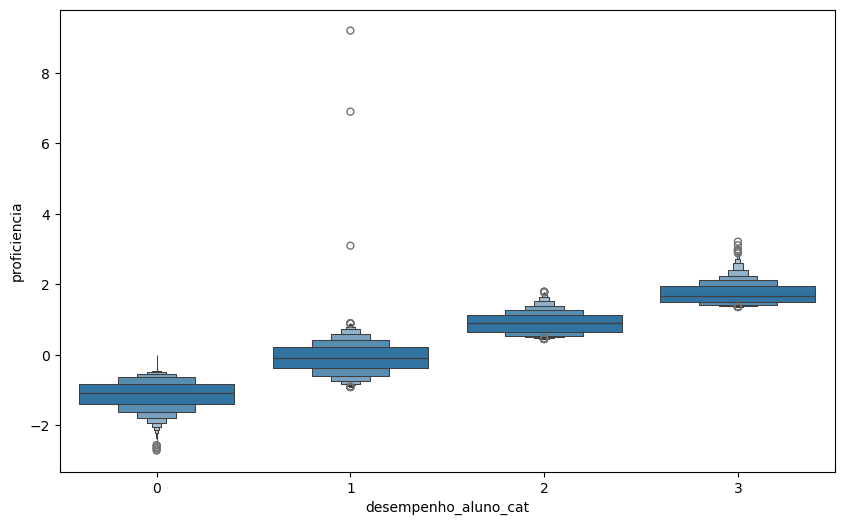

In [67]:
# boxenplot para visualização de outliers em proficiencia e erro padrao
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxenplot(x='desempenho_aluno_cat', y='proficiencia', data=df)
plt.show()

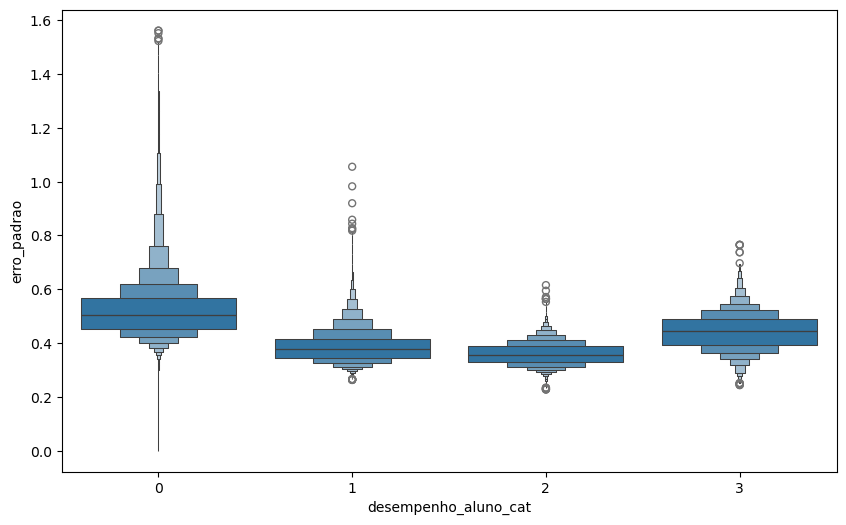

In [68]:
plt.figure(figsize=(10, 6))
sns.boxenplot(x='desempenho_aluno_cat', y='erro_padrao', data=df)
plt.show()

## Após remoção

In [69]:
# removing some outliers
df_cat1 = df[df['desempenho_aluno_cat'] == 1]
Q1, Q3 = df_cat1['proficiencia'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
df_cat1_cleaned = df_cat1[(df_cat1['proficiencia'] >= lower_bound) & (df_cat1['proficiencia'] <= upper_bound)]
df_cleaned = pd.concat([df[df['desempenho_aluno_cat'] != 1], df_cat1_cleaned])

df = df_cleaned

In [70]:
# removing outliers for 'erro_padrao'
Q1, Q3 = df['erro_padrao'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
df = df[(df['erro_padrao'] >= lower_bound) & (df['erro_padrao'] <= upper_bound)]

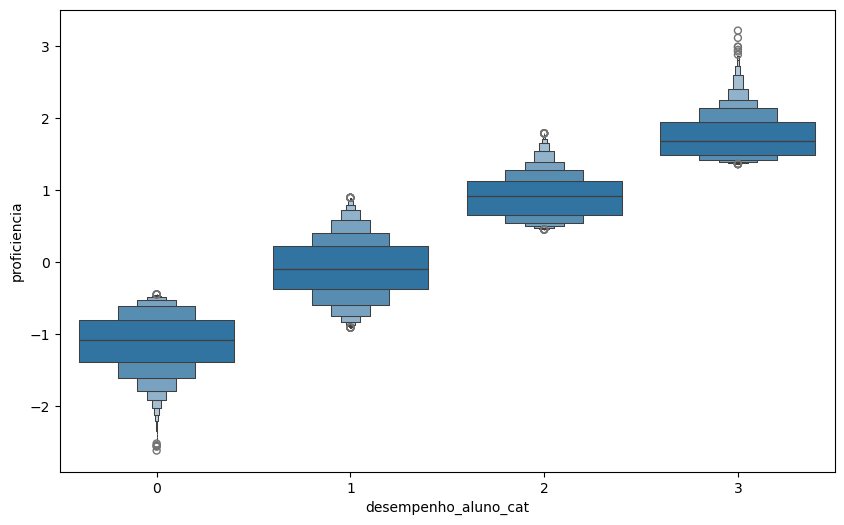

In [71]:
plt.figure(figsize=(10, 6))
sns.boxenplot(x='desempenho_aluno_cat', y='proficiencia', data=df)
plt.show()

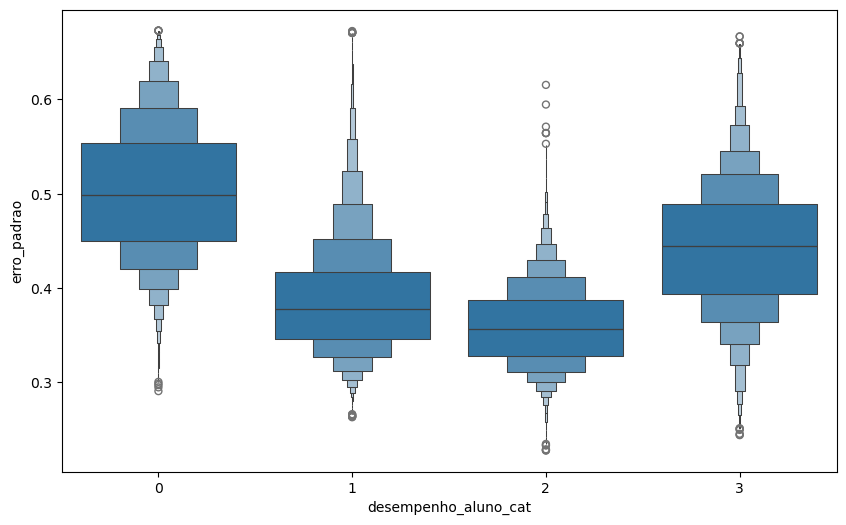

In [72]:
plt.figure(figsize=(10, 6))
sns.boxenplot(x='desempenho_aluno_cat', y='erro_padrao', data=df)
plt.show()

In [73]:
save = False

if save:
    df.to_pickle(os.path.join(DATA_FOLDER, 'saeb_pb_2017-2007_treated.pkl'))
    df.to_csv(os.path.join(DATA_FOLDER, 'saeb_pb_2017-2007_treated.csv'), index=False)
    print('Dataframe salvo com sucesso')